In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_orig = pd.read_csv('archive/supermarket_sales - Sheet1.csv')
df = df_orig.copy()

In [3]:
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [4]:
df1 =df.copy()

In [5]:
#df['date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df1['date_time']=pd.to_datetime(df1['Date']) 

In [6]:
df1['year'] = df1['date_time'].apply(lambda x: x.year)
df1['month'] = df1['date_time'].apply(lambda x: x.month)
df1['week'] = df1['date_time'].apply(lambda x: x.week)

In [7]:
df1['year'].unique()

array([2019], dtype=int64)

In [8]:
df1['month'].unique()

array([1, 3, 2], dtype=int64)

In [9]:
df1.head(1)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,date_time,year,month,week
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,2019,1,1


In [10]:
df.groupby('Branch').mean().sort_values(by ='gross income', ascending=False)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Branch,,,,,,,,
C,56.609024,5.582317,16.052367,337.099715,321.047348,4.761905,16.052367,7.072866
B,55.659277,5.481928,15.232024,319.872506,304.640482,4.761905,15.232024,6.818072
A,54.780853,5.467647,14.874001,312.354031,297.480029,4.761905,14.874001,7.027059


In [11]:
df.head(1)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1


In [12]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='count'>

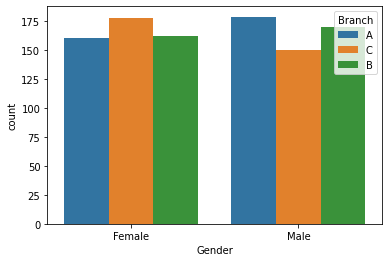

In [13]:
sns.countplot(x="Gender", data=df, hue='Branch')

<AxesSubplot:xlabel='Payment', ylabel='count'>

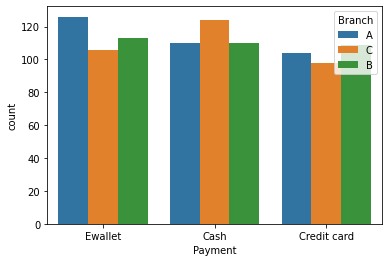

In [14]:
sns.countplot(x="Payment", data=df, hue='Branch')

<AxesSubplot:xlabel='Customer type', ylabel='count'>

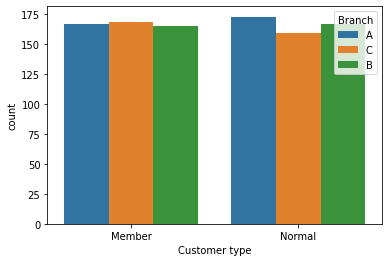

In [15]:
sns.countplot(x="Customer type", data=df, hue='Branch')

In [16]:
df1.head(1)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,date_time,year,month,week
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,2019,1,1


In [17]:
product_df = df1[['Product line', 'Branch', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating', 'date_time']]
product_df.head(1)

,Product line,Branch,Total,cogs,gross margin percentage,gross income,Rating,date_time
0,Health and beauty,A,548.9715,522.83,4.761905,26.1415,9.1,2019-01-05


Text(0.5, 1.0, 'Total Price per branch by date')

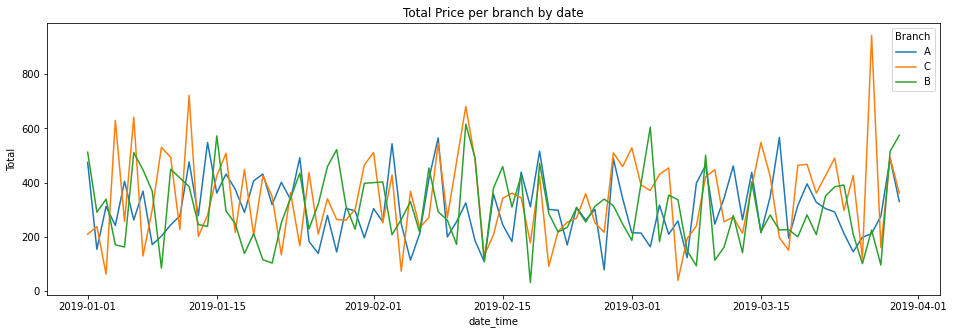

In [18]:
fig = plt.figure(figsize=(16,5))
sns.lineplot(data=product_df, x='date_time', y='Total', hue='Branch', ci=None)
plt.title("Total Price per branch by date")

Text(0.5, 1.0, 'Gross Income per branch by date')

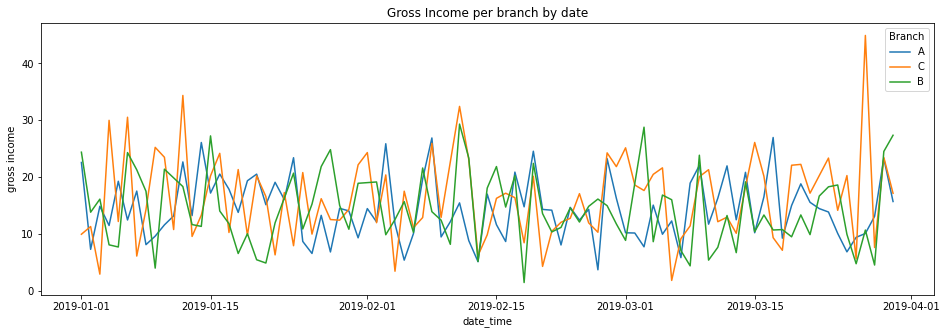

In [19]:
fig = plt.figure(figsize=(16,5))
sns.lineplot(data=product_df, x='date_time', y='gross income', hue='Branch', ci=None)
plt.title("Gross Income per branch by date")

In [20]:
product_df.head(1)

,Product line,Branch,Total,cogs,gross margin percentage,gross income,Rating,date_time
0,Health and beauty,A,548.9715,522.83,4.761905,26.1415,9.1,2019-01-05


In [21]:
product_df.groupby('Product line').mean()['Rating'].sort_values(ascending=False)

Product line
Food and beverages        7.113218
Fashion accessories       7.029213
Health and beauty         7.003289
Electronic accessories    6.924706
Sports and travel         6.916265
Home and lifestyle        6.837500
Name: Rating, dtype: float64

In [22]:
df1.head(1)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,date_time,year,month,week
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,2019,1,1


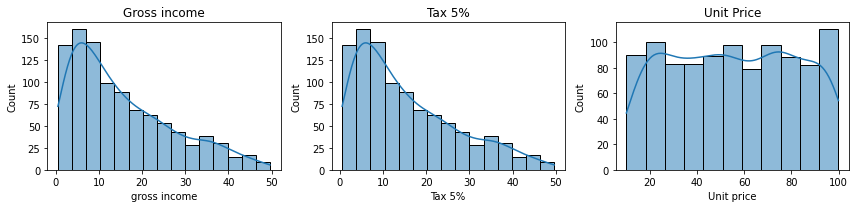

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))

sns.histplot(df1['gross income'], kde=True, ax=ax1)
ax1.set_title('Gross income')
sns.histplot(df1['Tax 5%'], kde=True, ax=ax2)
ax2.set_title('Tax 5%')
sns.histplot(df1['Unit price'], kde=True, ax=ax3)
ax3.set_title('Unit Price')
fig.tight_layout()
plt.show()

In [24]:
df1.head(1)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,date_time,year,month,week
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,2019,1,1


In [25]:
df1['Time']=pd.to_datetime(df1['Time']) 

In [26]:
df1['Time']= df1['Time'].apply(lambda x: x.hour)

Text(0.5, 1.0, 'Gross Income by time per branch')

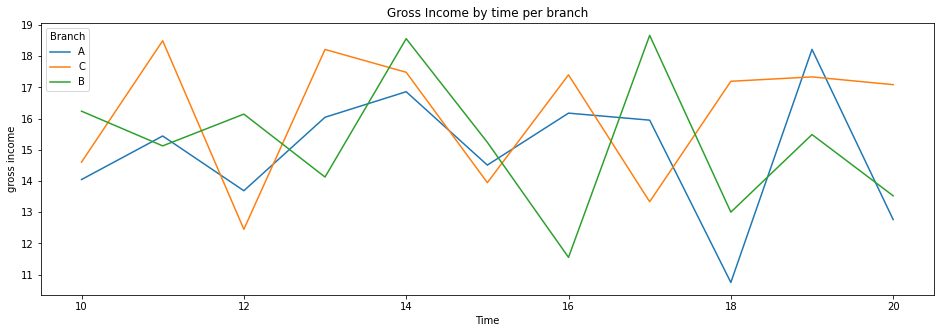

In [77]:
fig = plt.figure(figsize=(16,5))
sns.lineplot(data=df1, x='Time', y='gross income', hue='Branch', ci=None)
plt.title('Gross Income by time per branch')

In [28]:
parts_of_day =[]
for i in df1['Time'].values:
    if 5 <= i < 12:
        parts_of_day.append('Morning')
    elif 12 <=i < 17:
        parts_of_day.append('Afternoon')
    elif 17 <=i < 21:
        parts_of_day.append('Evening')
    else:
        parts_of_day.append('Night')

In [29]:
df1['Time_t'] =parts_of_day

Text(0.5, 1.0, 'Distribution of customer in Time')

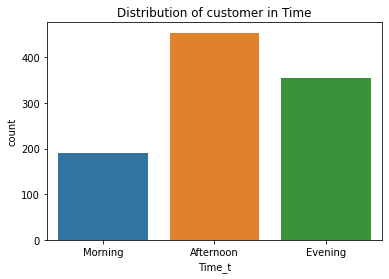

In [78]:
sns.countplot(df1['Time_t'], order=['Morning', 'Afternoon', 'Evening'])
plt.title('Distribution of customer in Time')

In [40]:
df_test = df1.copy()

In [41]:
df_test.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'date_time', 'year', 'month', 'week', 'Time_t'],
      dtype='object')

In [42]:
df_test.head(1)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,date_time,year,month,week,Time_t
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,2019,1,1,Afternoon


In [43]:
df_test = df_test.drop(['Invoice ID', 'Date', 'date_time', 'year', 'month'],axis=1)

In [44]:
df_test.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,week,Time_t
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13,Ewallet,522.83,4.761905,26.1415,9.1,1,Afternoon
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10,Cash,76.40,4.761905,3.8200,9.6,10,Morning
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13,Credit card,324.31,4.761905,16.2155,7.4,9,Afternoon
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20,Ewallet,465.76,4.761905,23.2880,8.4,4,Evening
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10,Ewallet,604.17,4.761905,30.2085,5.3,6,Morning


In [54]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [61]:
for i in list(df_test.select_dtypes(['object']).columns):
    le.fit(df_test[i].values)
    df_test[i] = le.transform(df_test[i].values)

In [62]:
df_test.head(1)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,week,Time_t
0,0,2,0,0,3,74.69,7,26.1415,548.9715,13,2,522.83,4.761905,26.1415,9.1,1,0


In [63]:
df_test.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Time', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'week', 'Time_t'],
      dtype='object')

In [65]:
from sklearn.model_selection import train_test_split

X = df_test[['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 
             'Total', 'Time', 'Payment', 'cogs','gross margin percentage','Rating', 'week', 'Time_t']]
y = df_test['gross income']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

In [66]:
from sklearn.linear_model import LinearRegression

model_lin = LinearRegression()
model_lin.fit(X_train, y_train)

LinearRegression()

In [68]:
pred_lin=model_lin.predict(X_test)
lin_score =model_lin.score(X_train,y_train)
lin_pred_score =round(lin_score*100,2)
lin_pred_score

100.0

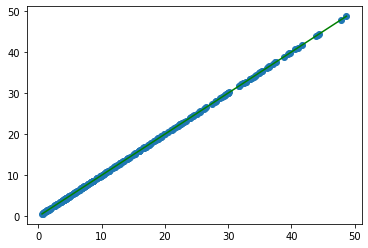

In [69]:
plt.scatter(y_test, pred_lin)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'g')

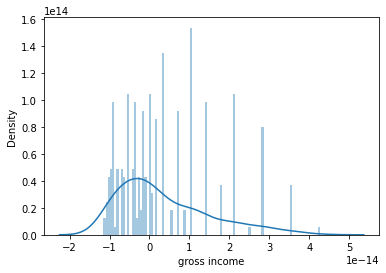

In [71]:
sns.distplot((y_test-pred_lin),bins=100);

In [72]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [73]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [75]:
test_pred =model_lin.predict(X_test)
train_pred = model_lin.predict(X_train)

In [76]:
print_evaluate(y_train,train_pred)

MAE: 9.174883075502294e-15
MSE: 1.5632796689856804e-28
RMSE: 1.250311828699417e-14
R2 Square 1.0
